In [100]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-class-imbalanced/creditcard.csv
/kaggle/input/credit-card-class-imbalanced/creditcard.csv


# Data Acquistion

In [101]:
# Reading dataset
credit_card_df = pd.read_csv("/kaggle/input/credit-card-class-imbalanced/creditcard.csv")

# Data Exploration

In [102]:
# shape of the dataset
credit_card_df.shape

(284807, 31)

In [103]:
# info of the dataset
credit_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [104]:
# describe
credit_card_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Missing value handling

In [105]:
# checking for null vaues
credit_card_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [106]:
# No null values in the set

# Visualisation of target variable

In [107]:
X = credit_card_df.drop(['Class'], axis = 1)
target = credit_card_df['Class']

In [108]:
# unique values
target.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

<Axes: ylabel='count'>

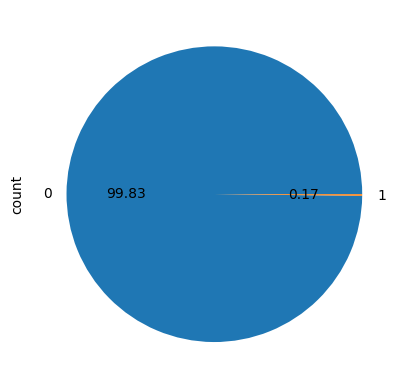

In [109]:
# 0 means not fraud and 1 means fraud
target.value_counts().plot.pie(autopct = '%.2f')

In [110]:
# As we can see there is a class imbalance between class 0 and class 1 so let's try to balance that

# Model without balancing

In [111]:
# train and test split
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = 0.2, random_state = 15)

# Random forest classification model
model = RandomForestClassifier(n_estimators = 10, random_state = 42)

# Fitting the model
model.fit(X_train, y_train)

# Prediction on test dataset
y_pred = rf_classifier_model.predict(X_test)

# Accuracy score
rus_accuracy = accuracy_score(y_test, y_pred)

# Classification report
rus_classification_report = classification_report(y_test, y_pred)

print(f'Accuracy score: {rus_accuracy:.2f}')
print(f'Classification report: \n {rus_classification_report}')

Accuracy score: 0.98
Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56857
           1       0.07      0.96      0.13       105

    accuracy                           0.98     56962
   macro avg       0.53      0.97      0.56     56962
weighted avg       1.00      0.98      0.99     56962



In this model Accuracy score is 98% but the f1 score for 'non fraud' is only 0.13 so further introducing class balancing.

# Class Balancing

### 1. Random Undersampling:
Undersampling will reduce the size of the majority class.

In [112]:
# For undersampling using RandomUnderSampler of imblearn library
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy = 1)
X_rus_df, y_rus_df = rus.fit_resample(X, target)

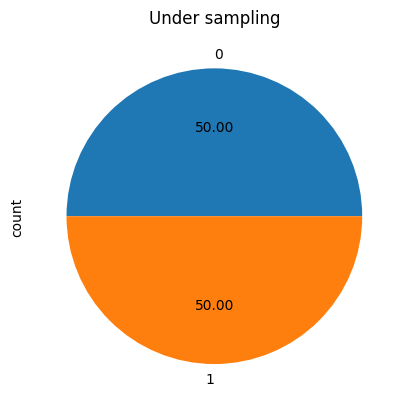

In [113]:
ax = y_rus_df.value_counts().plot.pie(autopct = '%.2f')
_ = ax.set_title('Under sampling')

In [114]:
y_rus_df.value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [115]:
# 'Majority' class size is decreased to the size of minority class

### 1. Random Oversampling:
Oversampling will increase the size of the minority class.

In [116]:
# For Oversampling using RandomUnderSampler of imblearn library
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy = 1)
X_ros_df, y_ros_df = ros.fit_resample(X, target)

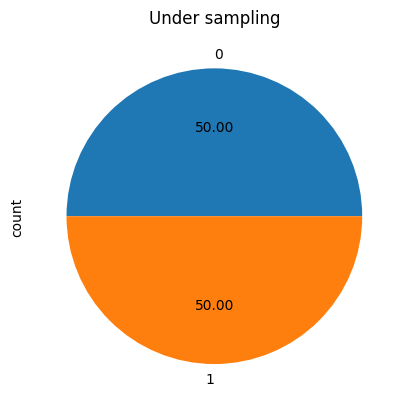

In [117]:
ax = y_ros_df.value_counts().plot.pie(autopct = '%.2f')
_ = ax.set_title('Under sampling')

In [118]:
y_ros_df.value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

In [119]:
# 'Minority' class size is increased to the size of majority class

# Model Preparation on Undersampling

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X_rus_df, y_rus_df, test_size = 0.2, random_state = 15, stratify=y_rus_df)

# Model fitting and prediction on Undersamping train test split

In [121]:
rf_classifier_model = RandomForestClassifier(n_estimators = 100 , random_state = 42)
rf_classifier_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [122]:
# Prediction on test dataset
y_pred = rf_classifier_model.predict(X_test)

In [123]:
rus_accuracy = accuracy_score(y_test, y_pred)
rus_classification_report = classification_report(y_test, y_pred)

print(f'Accuracy score: {rus_accuracy:.2f}')
print(f'Classification report: {rus_classification_report}')

Accuracy score: 0.94
Classification report:               precision    recall  f1-score   support

           0       0.92      0.97      0.95        99
           1       0.97      0.92      0.94        98

    accuracy                           0.94       197
   macro avg       0.95      0.94      0.94       197
weighted avg       0.95      0.94      0.94       197



# Model Preparation on Oversampling

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X_ros_df, y_ros_df, test_size = 0.2, random_state = 15, stratify = y_ros_df)

# Model fitting and prediction on Oversamping train test split

In [125]:
ros_rf_classifier_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
ros_rf_classifier_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [126]:
ros_y_pred = ros_rf_classifier_model.predict(X_test)

In [129]:
ros_accuracy_score = accuracy_score(y_test, ros_y_pred)
print(f'Accuracy score for Oversampling: {ros_accuracy_score:.2f}')

ros_classification_report = classification_report(y_test, ros_y_pred)
print(f'Classification report for Oversampling: \n {ros_classification_report}')


Accuracy score for Oversampling: 1.00
Classification report for Oversampling: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [128]:
# In this case undersampling is working fine and oversampling is overfitting